# Electric Vehicle Population Data 2025

This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).

## Access & Use Information
- Source: https://catalog.data.gov/dataset/electric-vehicle-population-data
- Public: This dataset is intended for public access and use.
- License: Open Data Commons Open Database License (ODbL) v1.0

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv('data/Electric_Vehicle_Population_Data.csv')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250659 entries, 0 to 250658
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         250659 non-null  object 
 1   County                                             250653 non-null  object 
 2   City                                               250653 non-null  object 
 3   State                                              250659 non-null  object 
 4   Postal Code                                        250653 non-null  float64
 5   Model Year                                         250659 non-null  int64  
 6   Make                                               250659 non-null  object 
 7   Model                                              250659 non-null  object 
 8   Electric Vehicle Type                              250659 non-null  object

In [40]:
print(df.isnull().sum())

VIN (1-10)                                             0
County                                                 6
City                                                   6
State                                                  0
Postal Code                                            6
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        21
Base MSRP                                             21
Legislative District                                 583
DOL Vehicle ID                                         0
Vehicle Location                                      14
Electric Utility                                       6
2020 Census Tract                                      6
dtype: int64


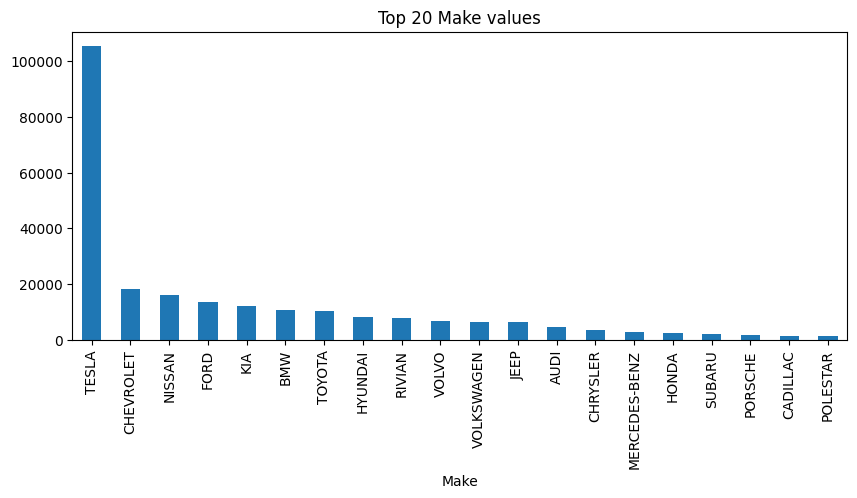

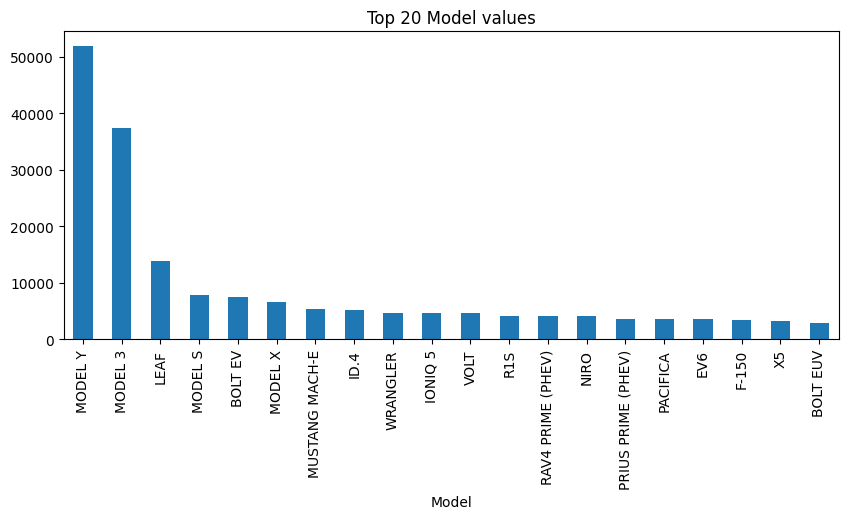

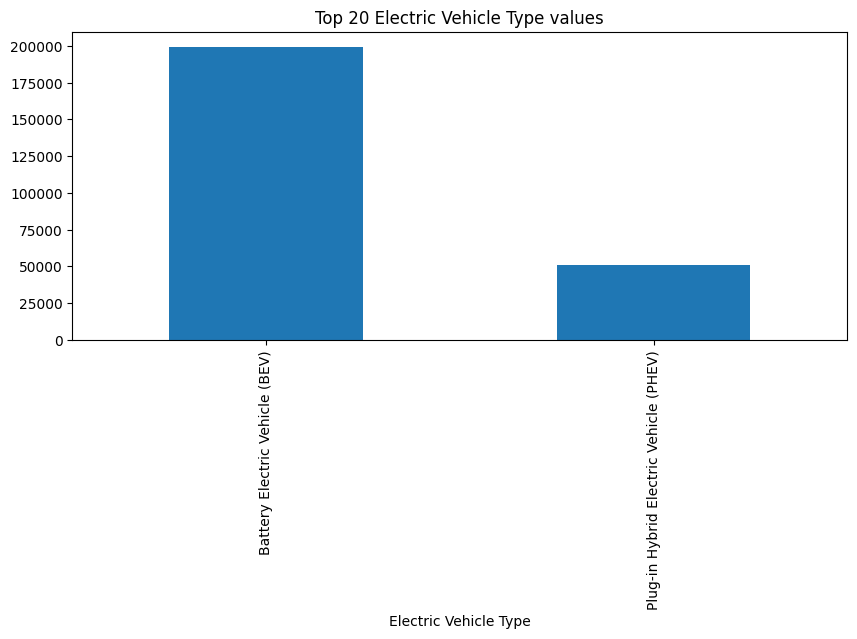

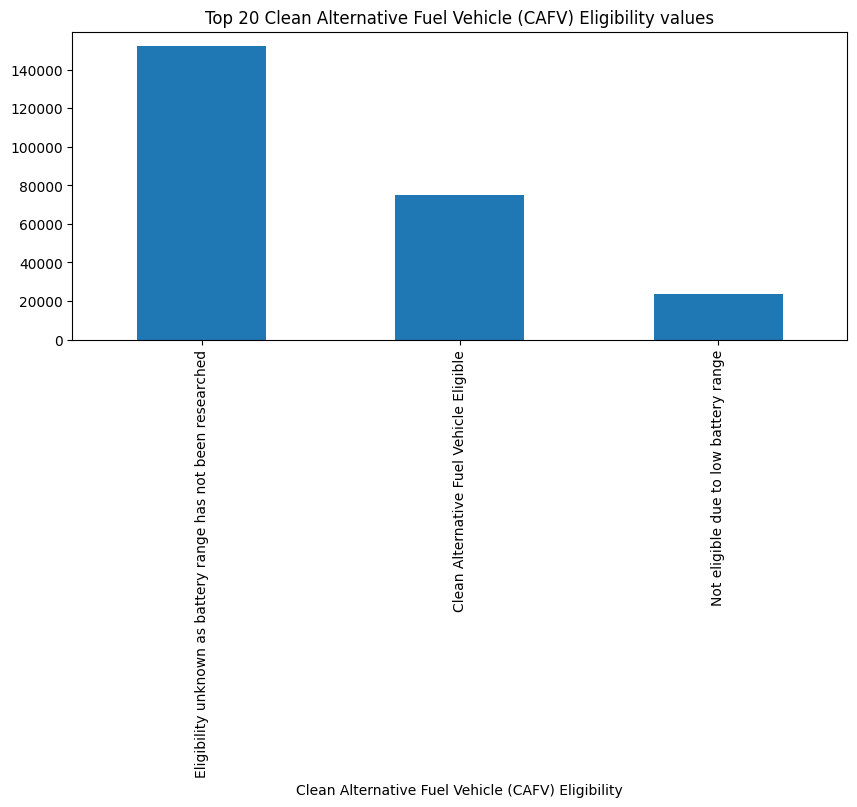

In [41]:
categorical_cols = ['Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']
#categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
for col in categorical_cols:
    plt.figure(figsize=(10,4))
    df[col].value_counts().head(20).plot(kind="bar")
    plt.title(f"Top 20 {col} values")
    plt.show()

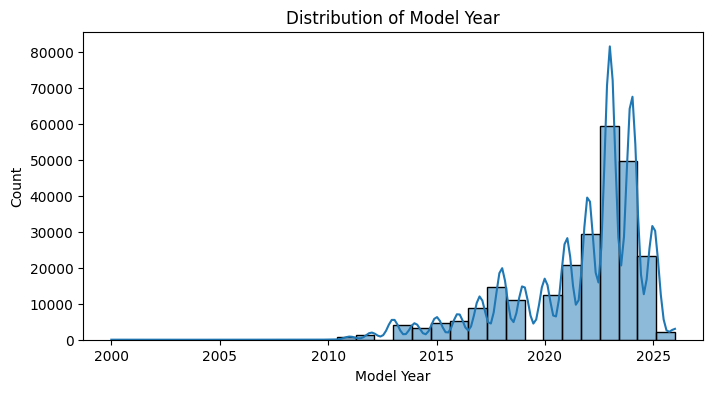

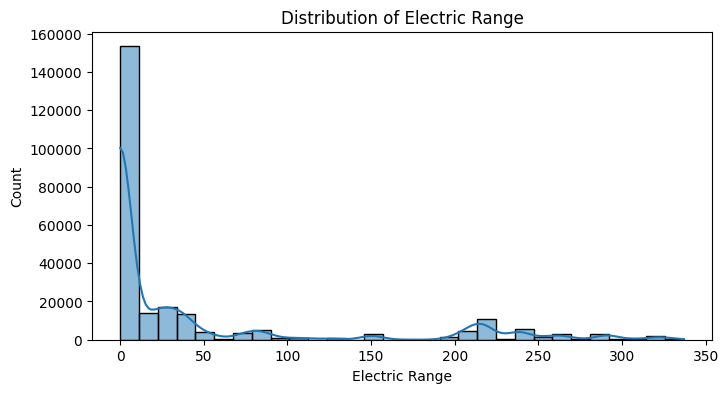

In [42]:
numerical_cols = ['Model Year', 'Electric Range']
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

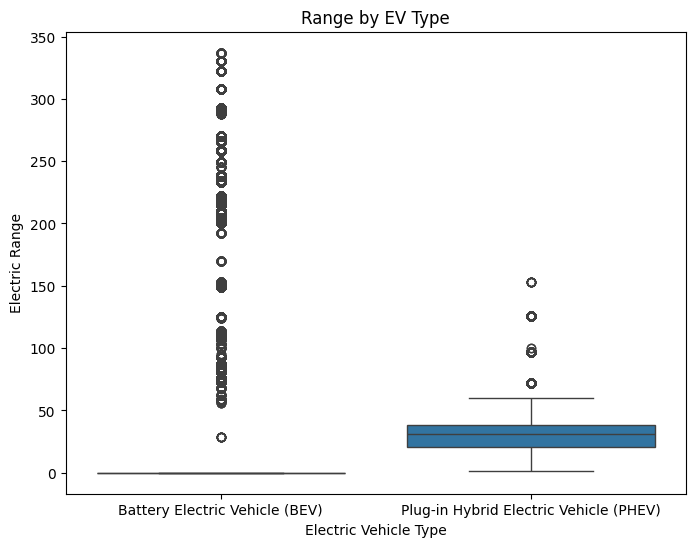

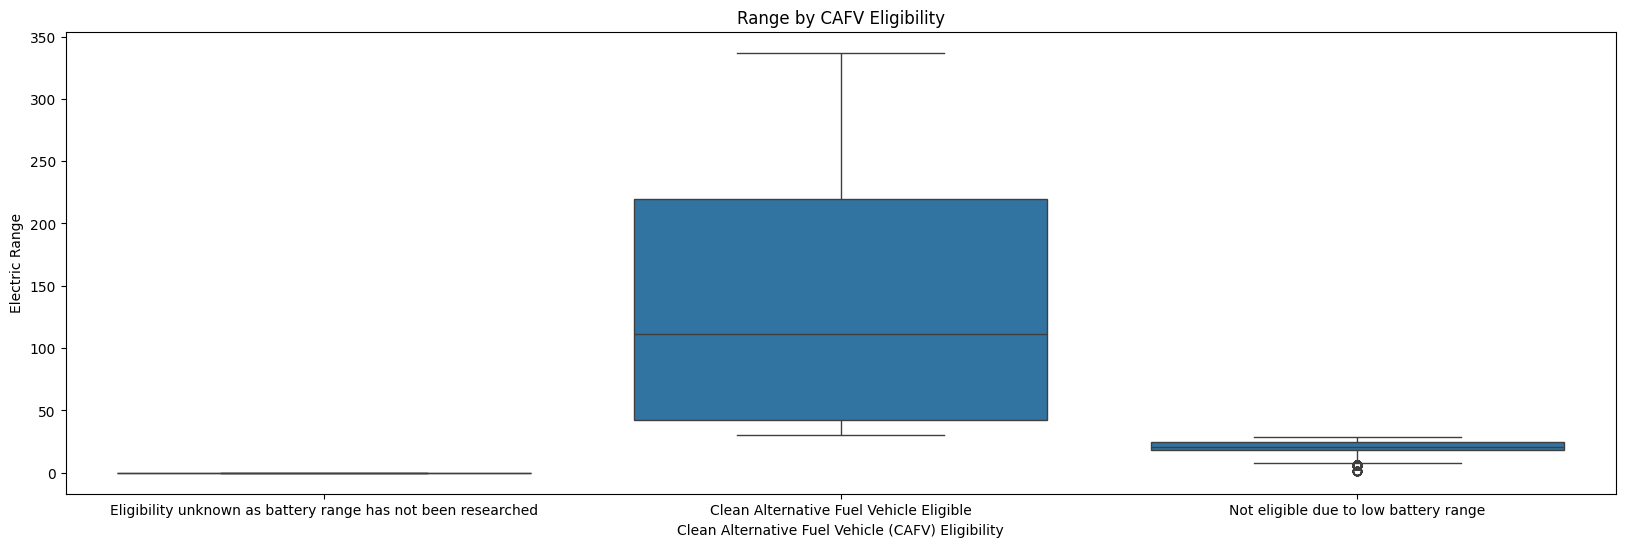

In [43]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Electric Vehicle Type", y="Electric Range", data=df)
plt.title("Range by EV Type")
plt.show()

plt.figure(figsize=(20,6))
sns.boxplot(x="Clean Alternative Fuel Vehicle (CAFV) Eligibility", y="Electric Range", data=df)
plt.title("Range by CAFV Eligibility")
plt.show()

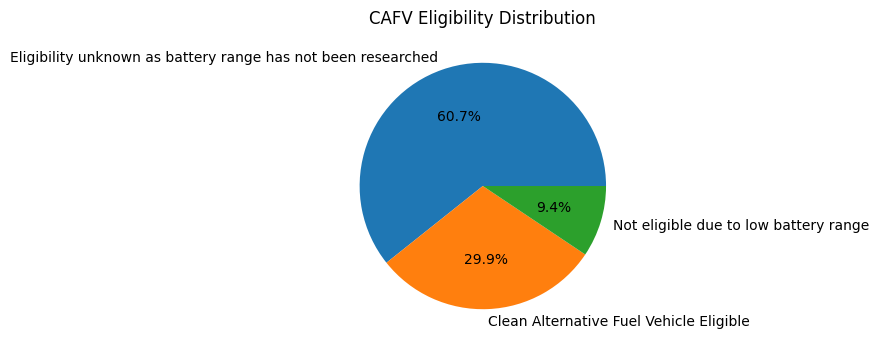

In [44]:
plt.figure(figsize=(6,4))
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("CAFV Eligibility Distribution")
plt.ylabel("")
plt.show()